In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [2]:
train = pd.read_csv("all/train.csv")
test = pd.read_csv("all/test.csv")

In [3]:
train = pd.DataFrame.as_matrix(train)

In [6]:
(_, _),(X_test, Y_test) = mnist.load_data()

In [7]:
X_test = X_test.astype("int64")
Y_test = Y_test.astype("int64")

In [8]:
np.random.shuffle(train)

In [9]:
X_original = train[:, 1:]
Y_original = train[:, 0]

# X_original = X_original.astype("float64")
# Y_original = Y_original.astype("float64")

In [10]:
X_original = X_original.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

m = X_original.shape[0]

X_train = X_original[:int((99 / 100) * m), :, :]
Y_train = Y_original[:int((99 / 100) * m)]

X_val = X_original[int((99 / 100) * m):m, :, :]
Y_val = Y_original[int((99 / 100) * m):m]

print(X_val.shape, Y_val.shape)
print(X_train.dtype, X_test.dtype)

(420, 28, 28) (420,)
int64 int64


In [11]:
def L_p_distance(test, train, p):
    d = np.zeros(train.shape[0])
    for i in range(train.shape[0]):
        d[i] = np.power(np.sum(np.power((test - train[i]) / 255, p)), 1 / p)

    dist = dict()
    for i in range(len(d)):
        dist[i] = d[i]
    
    return dist

In [12]:
def knn(labels, d, k):
    ### getting k min values ###
    sorted_d = sorted((value, key) for (key,value) in d.items())
    min_k = sorted_d[:k] 
    min_k_ind = np.zeros(k)

    ### getting k min values' indexes ###
    for i in range(len(min_k)):
        min_k_ind[i] = min_k[i][1]

    min_k_ind = min_k_ind.astype('int64')

    ### classifying image ###
    min_k_val = np.take(labels, min_k_ind)
    counts = np.bincount(min_k_val)
    digit = np.argmax(counts)
    
    return digit

In [13]:
def evaluate_model(x_test, y_train, x_train, k, p):
    m = x_test.shape[0]
    distances = {}
    digits = np.zeros(x_test.shape[0])

    for i in range(m):
        distances = L_p_distance(x_test[i], x_train, p)
        digits[i] = knn(y_train, distances, k)
        
    return digits

In [14]:
digits = evaluate_model(X_test[:500], Y_train, X_train, 1, 2)

In [15]:
digits = digits.astype("int")

In [16]:
print("Accuracy is : ", np.sum(digits == Y_test[:500]) / len(digits) * 100, "%")

Accuracy is :  98.2 %


In [229]:
digits

array([7, 2])

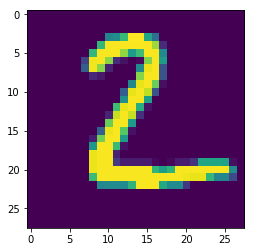

In [266]:
plt.imshow(X_test[1])

In [267]:
np.min(X_test[1] - X_train)

-255

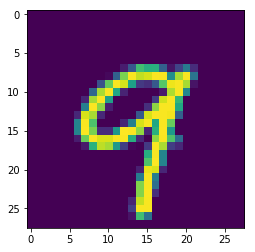

In [265]:
plt.imshow(X_train[1438])